In [2]:
%ls

diabetes.csv  sample_data/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("diabetes.csv")

In [74]:
# examine the dataframe
df.head(30)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   
29            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22        0  
28                     0.245   57        0  
29                     0.337   38        0

Boxplots

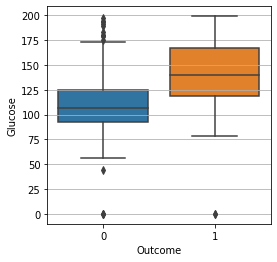

In [17]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="Glucose", data=df)

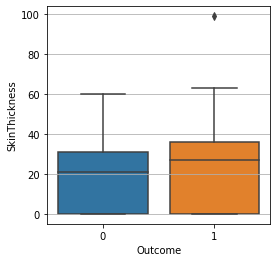

In [19]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="SkinThickness", data=df)

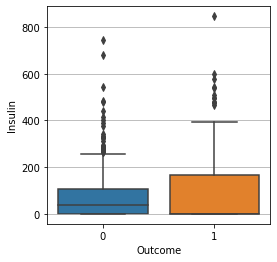

In [20]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="Insulin", data=df)

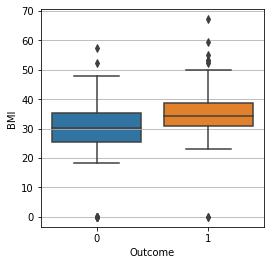

In [21]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="BMI", data=df)

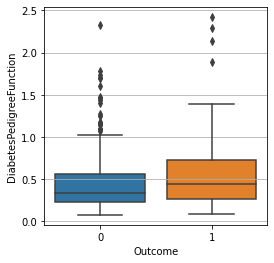

In [22]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)

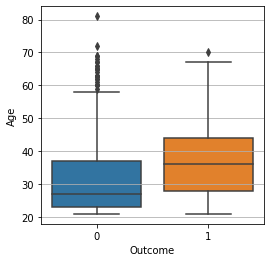

In [23]:
plt.figure(figsize=(4,4))
plt.grid()
sns.boxplot(x="Outcome", y="Age", data=df)

In [10]:
# Remove observations that has a BMI of 0
df_BMI_removed = df[df["BMI"] != 0]

Histogram

(array([ 33., 561., 163.]),
 array([  0.        ,  40.66666667,  81.33333333, 122.        ]),
 <a list of 3 Patch objects>)

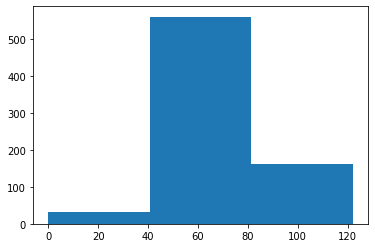

In [96]:
plt.hist(df_BMI_removed["BloodPressure"], density=False, bins=3)

(array([400., 345.,  11.,   1.]),
 array([ 0.  , 24.75, 49.5 , 74.25, 99.  ]),
 <a list of 4 Patch objects>)

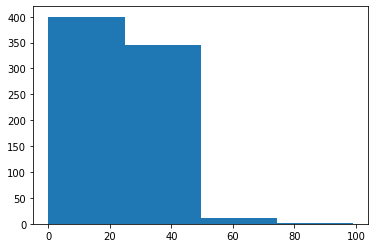

In [73]:
plt.hist(df_BMI_removed["SkinThickness"], density=False, bins=4)

(array([682.,  57.,  15.,   3.]),
 array([  0. , 211.5, 423. , 634.5, 846. ]),
 <a list of 4 Patch objects>)

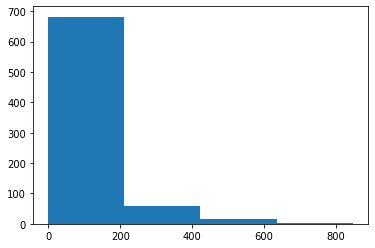

In [101]:
plt.hist(df_BMI_removed["Insulin"], density=False, bins=4)

Assumption testing for two sample te-tests and ANOVA

In [201]:
%pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 4.1 MB/s 


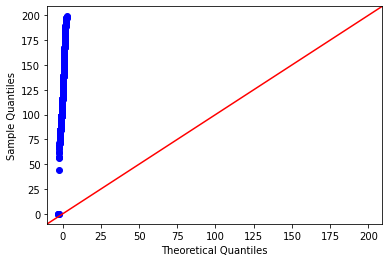

In [11]:
import statsmodels.api as sm

sm.qqplot(df_BMI_removed["Glucose"],line='45')
plt.show()

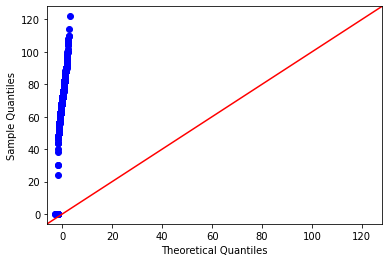

In [12]:
sm.qqplot(df_BMI_removed["BloodPressure"],line='45')
plt.show()

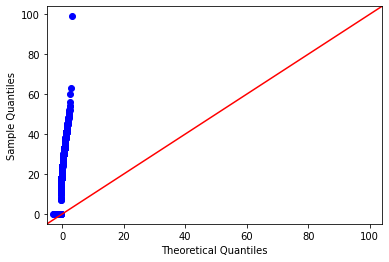

In [13]:
sm.qqplot(df_BMI_removed["SkinThickness"],line='45')
plt.show()

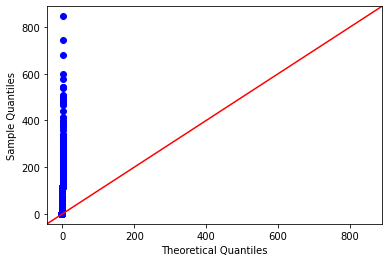

In [14]:
sm.qqplot(df_BMI_removed["Insulin"],line='45')
plt.show()

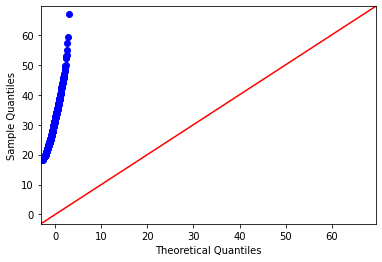

In [15]:
sm.qqplot(df_BMI_removed["BMI"],line='45')
plt.show()

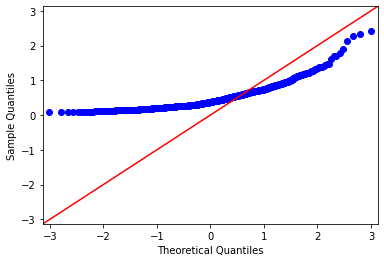

In [16]:
sm.qqplot(df_BMI_removed["DiabetesPedigreeFunction"],line='45')
plt.show()

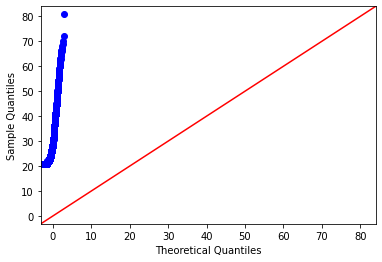

In [17]:
sm.qqplot(df_BMI_removed["Age"],line='45')
plt.show()

T-tests for missingness

In [87]:
def tTestsMissingness(columnName):
  attributeZero = df_BMI_removed[df_BMI_removed[columnName] == 0]["Glucose"]
  attributeNonZero = df_BMI_removed[df_BMI_removed[columnName] != 0]["Glucose"]
  print(f"number of observations with 0 {columnName}:", attributeZero.shape)
  res = stats.ttest_ind(attributeZero, attributeNonZero)
  display(res)
  print("--------------------")

In [88]:
# tTestsMissingness("Glucose")
tTestsMissingness("BloodPressure")
tTestsMissingness("SkinThickness")
tTestsMissingness("Insulin")

number of observations with 0 BloodPressure: (28,)


Ttest_indResult(statistic=0.3913464487678678, pvalue=0.6956515886135686)

--------------------
number of observations with 0 SkinThickness: (218,)


Ttest_indResult(statistic=1.7254862731558942, pvalue=0.0848490561686499)

--------------------
number of observations with 0 Insulin: (364,)


Ttest_indResult(statistic=-1.0517771581568969, pvalue=0.2932383123080601)

--------------------


Binning: to create bin for each attribute, we create a new column named f"{attr_name}_cate" respectively based on customized range.

In [97]:
del df_BMI_removed["BloodPressure_cate"]

In [98]:
# Blood pressure

rangeCate = ["low", "normal", "stage 1", "stage 2", "Hypertensive crisis"]
temp = []
for ind in df_BMI_removed.index:
  bp = df_BMI_removed['BloodPressure'][ind]

  # put into ranges:
  if bp < 60:
    temp.append(rangeCate[0])
  elif bp >= 60 and bp < 80:
    temp.append(rangeCate[1])
  elif bp >= 80 and bp < 90:
    temp.append(rangeCate[2])
  elif bp >= 90 and bp < 120:
    temp.append(rangeCate[3])
  elif bp >= 120:
    temp.append(rangeCate[4])

df_BMI_removed["BloodPressure_cate"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [103]:
# skin thickness
rangeCate = ["cate1", "cate2", "cate3", "cate4", "cate5"]
temp = []
for ind in df_BMI_removed.index:
  bp = df_BMI_removed['SkinThickness'][ind]

  # put into ranges:
  if bp < 24.75:
    temp.append(rangeCate[0])
  elif bp >= 24.75 and bp < 49.5:
    temp.append(rangeCate[1])
  elif bp >= 49.5 and bp < 74.25:
    temp.append(rangeCate[2])
  elif bp >= 74.25 and bp < 99:
    temp.append(rangeCate[3])
  elif bp >= 99:
    temp.append(rangeCate[4])

df_BMI_removed["SkinThickness_cate"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [104]:
# Insulin level
rangeCate = ["InsCate1", "InsCate2", "InsCate3", "InsCate4", "InsCate5"]
temp = []
for ind in df_BMI_removed.index:
  bp = df_BMI_removed['Insulin'][ind]

  # put into ranges:
  if bp < 211.5:
    temp.append(rangeCate[0])
  elif bp >= 211.5 and bp < 423:
    temp.append(rangeCate[1])
  elif bp >= 423 and bp < 634.5:
    temp.append(rangeCate[2])
  elif bp >= 634.5 and bp < 846:
    temp.append(rangeCate[3])
  elif bp >= 846:
    temp.append(rangeCate[4])

df_BMI_removed["Insulin_cate"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [105]:
# BMI

# range reference: https://health.clevelandclinic.org/bmi-for-women/#:~:text=BMI%20ranges%20for%20women,falls%20between%2018.5%20and%2024.9.

rangeCate = ["Underweight", "Normal", "Overweight", "Obese"]
temp = []
for ind in df_BMI_removed.index:
  bp = df_BMI_removed['BMI'][ind]

  # put into ranges:
  if bp < 18.5:
    temp.append(rangeCate[0])
  elif bp >= 18.5 and bp <= 24.9:
    temp.append(rangeCate[1])
  elif bp > 24.9 and bp <= 29.9:
    temp.append(rangeCate[2])
  elif bp > 29.9:
    temp.append(rangeCate[3])

df_BMI_removed["BMI_cate"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [106]:
# Age
rangeCate = ["younger", "middle aged", "older"]
temp = []
for ind in df_BMI_removed.index:
  bp = df_BMI_removed['Age'][ind]

  # put into ranges:
  if bp > 18 and bp <= 44:
    temp.append(rangeCate[0])
  if bp > 44 and bp <= 64:
    temp.append(rangeCate[1])
  elif bp >= 65:
    temp.append(rangeCate[2])

df_BMI_removed["Age_cate"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [107]:
df_BMI_removed.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome BloodPressure_cate  \
0                     0.627   50        1             normal   
1                     0.351   31        0             normal   
2                     0.672   32        1             normal   
3                     0.167   21        0             normal   
4                     2.288   33        1                low   

  SkinThickness_cate Insulin_cate    BMI_cate     Age_cate  
0              cate2     InsCate1       Obese  middle aged  
1              cate2     InsCate1  Overweight      younger  
2              cate1     InsCate1      Normal      younger  
3              cate1     InsCate1  Overweight      younger  
4              cate2     InsCate1       Obese      younger

ANOVA modeling

In [ ]:
# 0.5.1, which is the latest version, seems to have compatibility issue with scipy.stats
!pip install pingouin==0.5.0

In [117]:
import pingouin as pg

/usr/local/lib/python3.7/dist-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [122]:
res = pg.anova(data=df_BMI_removed, dv='Glucose',between='BloodPressure_cate',detailed=True)
print(res)
# since the p-value is 0.000078, we reject the null hypothesis and invoke post-hoc tukey test function.
pg.pairwise_tukey(data=df_BMI_removed, dv='Glucose',between='BloodPressure_cate', effsize='cohen')

               Source             SS   DF           MS         F     p-unc  \
0  BloodPressure_cate   24427.474411    4  6106.868603  6.101258  0.000078   
1              Within  752691.511058  752  1000.919563       NaN       NaN   

        np2  
0  0.031433  
1       NaN  


A        B     mean(A)     mean(B)       diff         se  \
0  Hypertensive crisis      low   96.000000  113.894737 -17.894737  31.775770   
1  Hypertensive crisis   normal   96.000000  119.538636 -23.538636  31.673244   
2  Hypertensive crisis  stage 1   96.000000  125.750000 -29.750000  31.746975   
3  Hypertensive crisis  stage 2   96.000000  136.465517 -40.465517  31.908883   
4                  low   normal  113.894737  119.538636  -5.643900   3.324878   
5                  low  stage 1  113.894737  125.750000 -11.855263   3.966211   
6                  low  stage 2  113.894737  136.465517 -22.570780   5.102669   
7               normal  stage 1  119.538636  125.750000  -6.211364   3.037375   
8               normal  stage 2  119.538636  136.465517 -16.926881   4.419508   
9              stage 1  stage 2  125.750000  136.465517 -10.715517   4.920169   

          T   p-tukey     cohen  
0 -0.563157  0.900000 -0.565621  
1 -0.743171  0.900000 -0.744015  
2 -0.937097  0.873384 -0.940345  
3 -1.268158  0.685763 -1.279044  
4 -1.697476  0.437779 -0.178394  
5 -2.989065  0.024070 -0.374724  
6 -4.423328  0.001000 -0.713423  
7 -2.044977  0.245536 -0.196330  
8 -3.830037  0.001307 -0.535029  
9 -2.177876  0.189108 -0.338699

In [125]:
res = pg.anova(data=df_BMI_removed, dv='Glucose',between='SkinThickness_cate',detailed=True)
print(res)
# since the p-value is 0.009109, we reject the null hypothesis and invoke post-hoc tukey test function.
pg.pairwise_tukey(data=df_BMI_removed, dv='Glucose',between='SkinThickness_cate', effsize='cohen')

               Source             SS   DF           MS         F     p-unc  \
0  SkinThickness_cate   11817.789286    3  3939.263095  3.875945  0.009109   
1              Within  765301.196182  753  1016.336250       NaN       NaN   

        np2  
0  0.015207  
1       NaN  


A      B     mean(A)     mean(B)       diff         se         T  \
0  cate1  cate2  118.402500  124.115942  -5.713442   2.342380 -2.439161   
1  cate1  cate3  118.402500  120.181818  -1.779318   9.743462 -0.182617   
2  cate1  cate5  118.402500  197.000000 -78.597500  31.919854 -2.462339   
3  cate2  cate3  124.115942  120.181818   3.934124   9.764226  0.402912   
4  cate2  cate5  124.115942  197.000000 -72.884058  31.926199 -2.282892   
5  cate3  cate5  120.181818  197.000000 -76.818182  33.297604 -2.307018   

    p-tukey     cohen  
0  0.070879 -0.179217  
1  0.900000 -0.055813  
2  0.066879 -2.465415  
3  0.900000  0.123404  
4  0.102929 -2.286198  
5  0.097263 -2.409602

In [127]:
res = pg.anova(data=df_BMI_removed, dv='Glucose',between='Insulin_cate',detailed=True)
print(res)

# since the p-value is 2.005313e-17, we reject the null hypothesis and invoke post-hoc tukey test function.
pg.pairwise_tukey(data=df_BMI_removed, dv='Glucose',between='Insulin_cate', effsize='cohen')

         Source             SS   DF            MS          F         p-unc  \
0  Insulin_cate   82426.723330    4  20606.680832  22.306602  2.005313e-17   
1        Within  694692.262139  752    923.792902        NaN           NaN   

        np2  
0  0.106067  
1       NaN  


A         B     mean(A)     mean(B)       diff         se         T  \
0  InsCate1  InsCate2  117.806452  146.859649 -29.053198   4.190636 -6.932885   
1  InsCate1  InsCate3  117.806452  162.266667 -44.460215   7.933519 -5.604097   
2  InsCate1  InsCate4  117.806452  181.000000 -63.193548  21.523266 -2.936058   
3  InsCate1  InsCate5  117.806452  189.000000 -71.193548  30.416236 -2.340643   
4  InsCate2  InsCate3  146.859649  162.266667 -15.407018   8.820039 -1.746820   
5  InsCate2  InsCate4  146.859649  181.000000 -34.140351  21.865574 -1.561375   
6  InsCate2  InsCate5  146.859649  189.000000 -42.140351  30.659416 -1.374467   
7  InsCate3  InsCate4  162.266667  181.000000 -18.733333  22.879743 -0.818774   
8  InsCate3  InsCate5  162.266667  189.000000 -26.733333  31.390749 -0.851631   
9  InsCate4  InsCate5  181.000000  189.000000  -8.000000  37.224849 -0.214910   

    p-tukey     cohen  
0  0.001000 -0.955887  
1  0.001000 -1.462798  
2  0.028204 -2.079148  
3  0.133079 -2.342358  
4  0.407418 -0.506910  
5  0.519594 -1.123261  
6  0.625517 -1.386471  
7  0.900000 -0.616350  
8  0.900000 -0.879561  
9  0.900000 -0.263210

In [130]:
res = pg.anova(data=df_BMI_removed, dv='Glucose',between='BMI_cate',detailed=True)
print(res)

# since the p-value is 9.981209e-08, we reject the null hypothesis and invoke post-hoc tukey test function.
pg.pairwise_tukey(data=df_BMI_removed, dv='Glucose',between='BMI_cate', effsize='cohen')

     Source             SS   DF            MS          F         p-unc  \
0  BMI_cate   35674.853359    3  11891.617786  12.076956  9.981209e-08   
1    Within  741444.132110  753    984.653562        NaN           NaN   

        np2  
0  0.045907  
1       NaN  


A            B     mean(A)     mean(B)       diff         se  \
0      Normal        Obese  107.980392  126.014831 -18.034438   3.426309   
1      Normal   Overweight  107.980392  116.346369  -8.365977   3.892856   
2      Normal  Underweight  107.980392   95.250000  12.730392  15.994276   
3       Obese   Overweight  126.014831  116.346369   9.668462   2.754449   
4       Obese  Underweight  126.014831   95.250000  30.764831  15.755936   
5  Overweight  Underweight  116.346369   95.250000  21.096369  15.863929   

          T   p-tukey     cohen  
0 -5.263517  0.001000 -0.574726  
1 -2.149059  0.138655 -0.266609  
2  0.795934  0.838495  0.405695  
3  3.510126  0.002670  0.308117  
4  1.952587  0.207255  0.980421  
5  1.329833  0.539012  0.672304

In [133]:
res = pg.anova(data=df_BMI_removed, dv='Glucose',between='Age_cate',detailed=True)
print(res)

# since the p-value is 6.861545e-07, we reject the null hypothesis and invoke post-hoc tukey test function.
pg.pairwise_tukey(data=df_BMI_removed, dv='Glucose',between='Age_cate', effsize='cohen')

     Source             SS   DF            MS          F         p-unc  \
0  Age_cate   28710.839830    2  14355.419915  14.462679  6.861545e-07   
1    Within  748408.145639  754    992.583748        NaN           NaN   

        np2  
0  0.036945  
1       NaN  


A        B     mean(A)     mean(B)       diff        se  \
0  middle aged    older  134.241379  137.133333  -2.891954  8.644594   
1  middle aged  younger  134.241379  118.324281  15.917098  3.184706   
2        older  younger  137.133333  118.324281  18.809052  8.231515   

          T  p-tukey     cohen  
0 -0.334539  0.90000 -0.091793  
1  4.997980  0.00100  0.505220  
2  2.285005  0.05855  0.597012

Linear Regression:
Model 1 (m1) is a model that eliminates 0s.

In [192]:
m1 = df_BMI_removed[df_BMI_removed["Insulin"] != 0]
m1 = m1[m1["SkinThickness"] != 0]

m1 = m1.reset_index()
m1_y = m1[["Glucose"]]
m1 = m1[["BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]]

In [185]:
m1_y.head()

Glucose
0       89
1      137
2       78
3      197
4      189

In [186]:
m1.head()

BloodPressure  SkinThickness  Insulin   BMI  Age  DiabetesPedigreeFunction
0             66             23       94  28.1   21                     0.167
1             40             35      168  43.1   33                     2.288
2             50             32       88  31.0   26                     0.248
3             70             45      543  30.5   53                     0.158
4             60             23      846  30.1   59                     0.398

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [188]:
m1_x_train, m1_x_test, m1_y_train, m1_y_test = train_test_split(m1, m1_y, test_size=0.2, random_state=1)

In [189]:
model = LinearRegression()
model.fit(m1_x_train, m1_y_train)
y_pred = model.predict(m1_x_test)

In [190]:
model.coef_

array([[0.12283789, 0.13452393, 0.14174769, 0.16502243, 0.663455  ,
        6.09136085]])

In [194]:
print('MSE:', metrics.mean_squared_error(m1_y_test,y_pred), 'R-squared', metrics.r2_score(m1_y_test, y_pred))

MSE: 617.0773707436466 R-squared 0.31210505120816323


Model 2 does not eliminate any observation.

In [170]:
df_BMI_removed = df_BMI_removed.reset_index()

In [179]:
m2_y = df_BMI_removed[["Glucose"]]
m2 = df_BMI_removed[["BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]]

In [180]:
m2_x_train, m2_x_test, m2_y_train, m2_y_test = train_test_split(m2, m2_y, test_size=0.2, random_state=1)

In [181]:
model2 = LinearRegression()
model2.fit(m2_x_train, m2_y_train)
y2_pred = model2.predict(m2_x_test)

In [182]:
model2.coef_

array([[ 0.04935113, -0.31316002,  0.09220854,  0.90188654,  0.6456191 ,
         7.74192299]])

In [193]:
print('MSE:', metrics.mean_squared_error(m2_y_test,y2_pred), 'R-squared', metrics.r2_score(m2_y_test, y2_pred))

MSE: 826.2591031791188 R-squared 0.2631240685076076
